<a href="https://www.kaggle.com/code/tristanjorge97/football-league-analysis-using-sql?scriptVersionId=119945407" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Motivation
Conduct basic data analysis using SQL, a standard language used by data scientists to manipulate and extract data from a database. Package implemented here is SQLite.

In [1]:
# Import Packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
import matplotlib.pyplot as plt

path = "../input/soccer/"  #Insert path here
database = path + 'database.sqlite'

In [2]:
db = sqlite3.connect(database)

tables = pd.read_sql("""SELECT * FROM sqlite_master WHERE type='table';""", db)
tables # check output

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


# Basic SELECT FROM
The most basic query to pull data from a table / database.
Here, we want to pull a list of countries (SELECT *) from the database (FROM db).

Definitions
* SELECT - to select data from a database
* FROM - database

In [3]:
countries = pd.read_sql("""SELECT * FROM Country;""", db)
countries # check output

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


# Basic JOIN ON
We use JOIN to merge two tables to each other ON a common key.
A key is a unique identifier for each record (row) in a table, usually consisting of either one value (cell) or a combination of values that are unique in the table.
Example query:
> SELECT * FROM table1 **JOIN** table 2 **ON** table1.id = table2.id

Different Types of JOIN
* (INNER) JOIN - default JOIN function, merges tables on records that have matching values in both tables 
* LEFT JOIN - merges all records from the left table, and the matching records from the right table (result added as 0 if there is no match)
* RIGHT JOIN - merges all records from the right table, and the matching records from the left table (result added as 0 if there is no match)
* FULL JOIN - merges all records when there is a match in left or right table records (can potentially return very large results)

To get a list of leagues and their respective country, we JOIN the Country and League tables ON the key Country.id (since League.country_id is not unique; there can be multiple leagues in one country)

In [4]:
leagues = pd.read_sql("""SELECT * FROM League JOIN Country ON Country.id = League.country_id;""", db) # JOIN used is INNER JOIN by default
leagues # check output

,id,country_id,name,id,name
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy
5,13274,13274,Netherlands Eredivisie,13274,Netherlands
6,15722,15722,Poland Ekstraklasa,15722,Poland
7,17642,17642,Portugal Liga ZON Sagres,17642,Portugal
8,19694,19694,Scotland Premier League,19694,Scotland
9,21518,21518,Spain LIGA BBVA,21518,Spain


# Basic AS, ORDER BY, LIMIT, and WHERE
Previously we ran the following code:
> countries = pd.read_sql("""SELECT * FROM Country;""", db)

Here, we selected all columns (*) from the table Country
If we are only interested in a certain column such as "name", we will select the respective cell instead:
> country_names = pd.read_sql("""SELECT name FROM Country;""", db)

When dealing with multiple tables from a database, it is likely that some cells will have the same name (such as Country.name and League.name). When joining these tables, we should rename these cells using AS.

In the following query, we are looking to obtain a list of matches from the table Match, with details obtained from the other tables (Country, League, Team). In particular, we are looking to select columns WHERE the country name is 'Spain', ORDER BY date, with a LIMIT of 10 matches for the resulting table (detailed_matches)

Definitions
* AS - to create a temporary alias for a column or table that can be used in the SELECT statement
* ORDER BY - to order the results in ASCending or DESCending order (default ASC)
* LIMIT - to set an upper limit on the nubmer of rows returned by SQL
* WHERE - used to filter rows that fulfil a specific condition



In [5]:
detailed_matches = pd.read_sql("""SELECT Match.id,
                                        Country.name AS country_name,
                                        League.name AS league_name,
                                        season,
                                        stage,
                                        date,
                                        HT.team_long_name AS home_team,
                                        AT.team_long_name AS away_team,
                                        home_team_goal,
                                        away_team_goal
                                    FROM Match
                                    JOIN Country on Country.id = Match.country_id
                                    JOIN League on League.id = Match.league_id
                                    LEFT JOIN Team as HT on HT.team_api_id = Match.home_team_api_id
                                    LEFT JOIN Team as AT on AT.team_api_id = Match.away_team_api_id
                                    WHERE country_name = 'Spain'
                                    ORDER BY date
                                    LIMIT 10;""", db)
detailed_matches #check output

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,21518,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,Valencia CF,RCD Mallorca,3,0
1,21525,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,RCD Espanyol,Real Valladolid,1,0
2,21519,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CA Osasuna,Villarreal CF,1,1
3,21520,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,RC Deportivo de La Coruña,Real Madrid CF,2,1
4,21521,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CD Numancia,FC Barcelona,1,0
5,21522,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Racing Santander,Sevilla FC,1,1
6,21523,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Sporting de Gijón,Getafe CF,1,2
7,21524,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Betis Balompié,RC Recreativo,0,1
8,21526,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Athletic Club de Bilbao,UD Almería,1,3
9,21527,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Atlético Madrid,Málaga CF,4,0


# Basic GROUP BY, HAVING
Here, we look at the data at a more aggregated level. We can start grouping the raw data to the levels that we want to examine. With the previous query as a base, we can start to analyse the data at the country-league-season level. We can group these data using the clause GROUP BY (column name) in between WHERE and HAVING.

Definitions
* GROUP BY - groups rows that have the same values into summary rows; can be used with aggregate functions  (i.e., count, avg, sum)
* HAVING - used in a similar way to WHERE with the exception that it can handle aggregate functions


In [6]:
leagues_by_season = pd.read_sql("""SELECT Country.name AS country_name,
                                        League.name AS league_name,
                                        season,
                                        count(distinct stage) AS number_of_stages,
                                        count(distinct HT.team_long_name) AS number_of_teams,
                                        avg(home_team_goal) AS avg_home_team_goals,
                                        avg(away_team_goal) AS avg_away_team_goals,
                                        avg(home_team_goal-away_team_goal) AS avg_goal_diff,
                                        avg(home_team_goal+away_team_goal) AS avg_goals,
                                        sum(home_team_goal+away_team_goal) AS tot_goals
                                    FROM Match
                                    JOIN Country on Country.id = Match.country_id
                                    JOIN League on League.id = Match.league_id
                                    LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                    LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                    WHERE country_name in ('England', 'Germany', 'France', 'Italy', 'Spain')
                                    GROUP BY Country.name, League.name, season
                                    HAVING count(distinct stage) > 10
                                    ORDER BY Country.name, League.name, season DESC;
                                    """, db)
leagues_by_season #check output

,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_goals,avg_away_team_goals,avg_goal_diff,avg_goals,tot_goals
0,England,England Premier League,2015/2016,38,20,1.492105,1.207895,0.284211,2.700000,1026
1,England,England Premier League,2014/2015,38,20,1.473684,1.092105,0.381579,2.565789,975
2,England,England Premier League,2013/2014,38,20,1.573684,1.194737,0.378947,2.768421,1052
3,England,England Premier League,2012/2013,38,20,1.557895,1.239474,0.318421,2.797368,1063
4,England,England Premier League,2011/2012,38,20,1.589474,1.215789,0.373684,2.805263,1066
5,England,England Premier League,2010/2011,38,20,1.623684,1.173684,0.450000,2.797368,1063
6,England,England Premier League,2009/2010,38,20,1.697368,1.073684,0.623684,2.771053,1053
7,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942
8,France,France Ligue 1,2015/2016,38,20,1.436842,1.089474,0.347368,2.526316,960
9,France,France Ligue 1,2014/2015,38,20,1.410526,1.081579,0.328947,2.492105,947


# Visualizing Data Graphically using matplotlib
What we have now are just a list of numbers in a table, which is not the easiest to read and definitely not the most pleasing to the eye. Visualizing Data with graphs or diagrams helps people process and better understand the data we have just analysed so that everyone can be on the same page, regardless of their technical level or expertise.

In the following two cells of code, we look at the following:
* Average Goals per Game Over Time per League
* Average Home Team Goals per Game Over Time per League

We look at these charts to determine the performances of the respective Leagues in terms of goals scored, and compare them with the goals scored by the home team to determine the home team advantage and accountability with respect to these performances.

<AxesSubplot:title={'center':'Average Goals per Game Over Time'}>

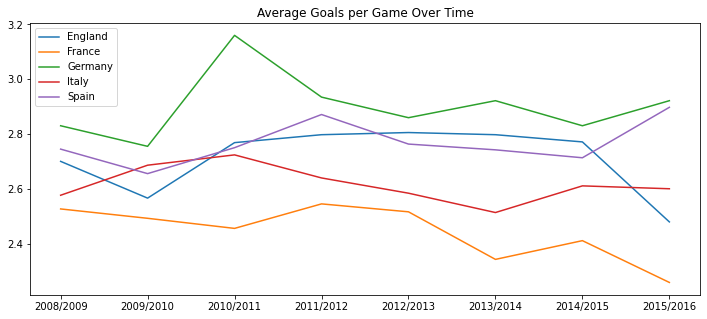

In [7]:
# Average Goals per Game Over Time per League
df = pd.DataFrame(index=np.sort(leagues_by_season['season'].unique()), columns=leagues_by_season['country_name'].unique())

df.loc[:,'England'] = list(leagues_by_season.loc[leagues_by_season['country_name']=='England','avg_goals'])
df.loc[:,'Germany'] = list(leagues_by_season.loc[leagues_by_season['country_name']=='Germany','avg_goals'])
df.loc[:,'France'] = list(leagues_by_season.loc[leagues_by_season['country_name']=='France','avg_goals'])
df.loc[:,'Italy'] = list(leagues_by_season.loc[leagues_by_season['country_name']=='Italy','avg_goals'])
df.loc[:,'Spain'] = list(leagues_by_season.loc[leagues_by_season['country_name']=='Spain','avg_goals'])

df.plot(figsize=(12,5),title='Average Goals per Game Over Time')

<AxesSubplot:title={'center':'Average Home Team Goals per Game Over Time'}>

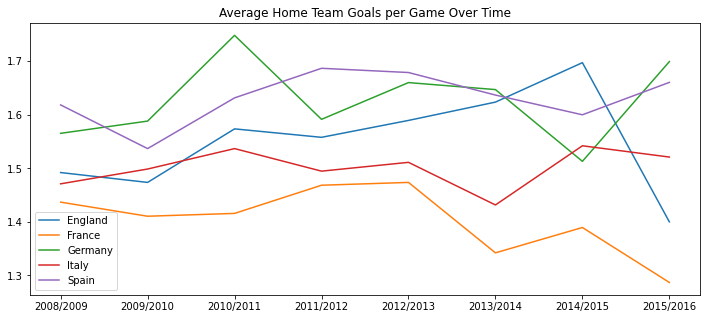

In [8]:
# Average Home Team Goals per Game Over Time per League
df = pd.DataFrame(index=np.sort(leagues_by_season['season'].unique()), columns=leagues_by_season['country_name'].unique())

df.loc[:,'England'] = list(leagues_by_season.loc[leagues_by_season['country_name']=='England','avg_home_team_goals'])
df.loc[:,'Germany'] = list(leagues_by_season.loc[leagues_by_season['country_name']=='Germany','avg_home_team_goals'])
df.loc[:,'France'] = list(leagues_by_season.loc[leagues_by_season['country_name']=='France','avg_home_team_goals'])
df.loc[:,'Italy'] = list(leagues_by_season.loc[leagues_by_season['country_name']=='Italy','avg_home_team_goals'])
df.loc[:,'Spain'] = list(leagues_by_season.loc[leagues_by_season['country_name']=='Spain','avg_home_team_goals'])

df.plot(figsize=(12,5),title='Average Home Team Goals per Game Over Time')

# Order of Execution of a Query
We can liken the order of execution of the SQL query as the step-by-step process of our analysis.
* Each query begins with finding the data that we need from a database (SELECT + FROM + JOIN)
* We then filter that data using specific conditions of interest (WHERE)
* We can opt to group the data by the level required (GROUP BY)
* We can also add more conditions to filter the resulting table further (HAVING)
* We order the output of the resulting table (ORDER BY)
* We can limit the number of rows we would like to output, particularly if the dataset is large (LIMIT)

Each part of the query is executed sequentially, so it is important to understand the order of execution so that we know which results are accessible where.

General Order of Execution:
1. SELECT *column_name(s)*
2. FROM *table1_name*
3. JOIN *table2_name* ON *table1_name.table1_row* = *table2_name.table2_row*
4. WHERE *condition*
5. GROUP BY *column_name(s)*
6. HAVING *condition*
7. ORDER BY *column_name(s)*


# Sub Queries and Functions
In the following example, we are looking to create a table that allows us to better understand the height distribution of soccer players and their associated overall player ratings, potential, and weights. We can do this by joining the PLAYER table to the PLAYER_ATTRIBUTES table. However, a simple join would not be appropriate as the first table (PLAYER) contains one row per player, while the key in the second table (PLAYER_ATTRIBUTES) is player+season. A regular join in this case would cause each player's attributes to appear in the new table as many times as they appear in the PLAYER_ATTRIBUTES table. This would cause the calculated average results to be skewed towards players that appeared many more times in the PLAYER_ATTRIBUTES table.

To resolve this, we use subqueries. The benefit of subqueries is that it allows us to manipulate the data without the need for an external script, especially in structured tables that cannot be joined directly. Thus, this skill is essential in SQL, especially in working with multiple tables in a big data setting.

The subquery in this case would be to group the PLAYER_ATTRIBUTES table to a specific key at the player level. Here, you can decide how you would like to combine the attributes to a single row, but in this case, we look to use average for the aggregation.


In [9]:
player_details = pd.read_sql("""SELECT ROUND(height) AS height,
                                        COUNT(height) AS distribution,
                                        (AVG(PA.avg_overall_rating)) AS avg_overall_rating,
                                        (AVG(PA.avg_potential)) AS avg_potential,
                                        AVG(weight) AS avg_weight
                                    FROM PLAYER
                                    LEFT JOIN (SELECT Player_Attributes.player_api_id,
                                                AVG(Player_Attributes.overall_rating) AS avg_overall_rating,
                                                AVG(Player_Attributes.potential) AS avg_potential
                                                FROM PLAYER_ATTRIBUTES
                                                GROUP BY Player_Attributes.player_api_id)
                                                AS PA ON PLAYER.player_api_id = PA.player_api_id
                                    GROUP BY height
                                    ORDER BY height
                                        ;""", db)

player_details #check output

,height,distribution,avg_overall_rating,avg_potential,avg_weight
0,157.0,1,66.300000,71.200000,117.000000
1,160.0,2,74.611658,79.217570,124.500000
2,163.0,9,69.135958,74.630241,137.222222
3,165.0,62,66.891988,72.983008,140.629032
4,168.0,118,67.500518,73.124182,144.127119
5,170.0,403,67.726903,73.379056,147.799007
6,173.0,530,66.980272,72.848746,152.824528
7,175.0,1188,66.805204,72.258774,156.111953
8,178.0,1489,66.367212,71.943339,160.665547
9,180.0,1388,66.419053,71.846394,165.261527
